In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets,linear_model,metrics

In [2]:
df  = pd.read_csv('50_Startups.csv')

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [5]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [6]:
df.shape

(50, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [8]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [9]:
df.isnull().sum()
#There is no any null value present in this dataset

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [10]:
df[df.duplicated()]
#No any duplicate records available

,R&D Spend,Administration,Marketing Spend,State,Profit


In [11]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [12]:
df['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [13]:
df['State'] = df['State'].map({'New York':1,'California':2,'Florida':3})
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,1,192261.83
1,162597.70,151377.59,443898.53,2,191792.06
2,153441.51,101145.55,407934.54,3,191050.39
3,144372.41,118671.85,383199.62,1,182901.99
4,142107.34,91391.77,366168.42,3,166187.94


In [14]:
# splitting dataset into dependent and independent variable
x = df.iloc[:, :-1].values  #dependent
y = df.iloc[:, 4].values    #independent

In [15]:
# split data into train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,train_size=0.7,random_state=1)

In [16]:
print("x_train :",x_train.shape)
print("x_test :",x_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape )

x_train : (35, 4)
x_test : (15, 4)
y_train : (35,)
y_test : (15,)


In [17]:
# training the model
from sklearn.linear_model import LinearRegression

regressor= LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [18]:
# testing the model using predict function
y_pred=regressor.predict(x_test)
y_pred

array([115659.77059332,  91007.59140397,  75718.32207793,  70729.36239011,
       179757.69526061, 172440.94135308,  49281.64536173, 101666.62716457,
        58621.09593396,  97568.95172458,  97782.46494082,  83841.5166348 ,
       118250.77053583,  76134.28563591, 113913.54143529])

In [19]:
x_pred=regressor.predict(x_train)
x_pred

array([ 71230.25399857,  49139.10709609, 109441.12236366, 114656.87494788,
       126934.5628842 ,  74853.6032934 , 130287.15609359,  48677.04804713,
       112400.49162928, 109976.94171631, 169709.79018616,  97589.82343616,
       147887.95733246,  98078.87874484, 133706.14924308, 101200.86869681,
        65076.05758504,  90094.36318197, 128143.51652049, 116746.08454217,
       101826.911116  , 155176.67627862, 158374.48783855,  47292.99616799,
       187742.21275477, 116785.89590304, 191430.76445294, 145159.36383406,
       162380.26682713, 134127.81374925, 153263.49098799, 151169.97781718,
       128002.47656999,  60971.5921885 ,  89303.18197469])

In [20]:
y_pred.shape

(15,)

In [21]:
#Comparing the predicted values and actual values
df = pd.DataFrame(data={'Predicted value':y_pred.flatten(),'Actual Value':y_test.flatten()})
df

,Predicted value,Actual Value
0,115659.770593,105008.31
1,91007.591404,96479.51
2,75718.322078,78239.91
3,70729.362390,81229.06
4,179757.695261,191050.39
5,172440.941353,182901.99
6,49281.645362,35673.41
7,101666.627165,101004.64
8,58621.095934,49490.75
9,97568.951725,97483.56


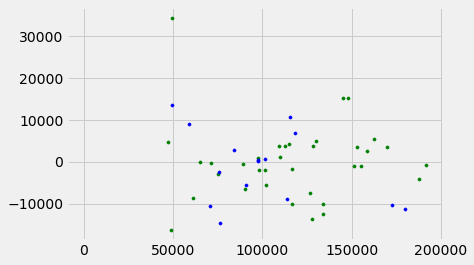

In [22]:
plt.style.use('fivethirtyeight')
plt.scatter(regressor.predict(x_train),regressor.predict(x_train) - y_train,
            color = 'green',s=10,label='Train Data')
plt.scatter(regressor.predict(x_test),regressor.predict(x_test) - y_test,
            color = 'blue',s=10,label='Test Data')
plt.hlines(y = 0,xmin=0,xmax=50,linewidth = 2)

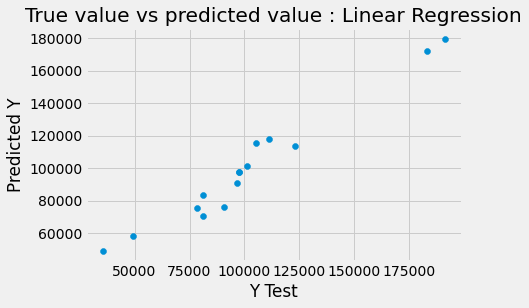

In [23]:
plt.scatter(y_test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.title("True value vs predicted value : Linear Regression")
plt.show()

In [24]:
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y_test, y_pred)
print('Mean Square Error ' ,mse)

rmse=np.log(np.sqrt(mse))
print('Root Mean Square Error',rmse)

score = r2_score(y_test, y_pred)
print('Score',score)
# r2 score lies between 0 and 1. IF it is closer to 1 then model is good

Mean Square Error  74213708.09524822
Root Mean Square Error 9.061229718146645
Score 0.9532099796986934


In [26]:
print('Train Score: ', regressor.score(x_train, y_train))  
print('Test Score: ', regressor.score(x_test, y_test))

Train Score:  0.9460948395893345
Test Score:  0.9532099796986934
